In [1]:
# Imports
import pandas as pd
import seaborn as sns
from scipy.stats.contingency import association
import numpy as np
import matplotlib.pyplot as plt

# Load the data
train = pd.read_csv('../data/academic_success/train.csv')
# test = pd.read_csv('../data/academic_success/test.csv')
# sample = pd.read_csv('../data/academic_success/sample_submission.csv')

train.columns = train.columns.str.replace('Curricular units ', '').str.replace('qualification', 'education')
train.columns = train.columns.str.replace('without evaluations', 'no grade').str.replace('Previous', 'Prior')

nominal_features = [
    'Marital status',
    'Application mode',
    'Course',
    'Daytime/evening attendance',
    'Prior education',
    'Nacionality',
    "Mother's education",
    "Father's education",
    "Mother's occupation",
    "Father's occupation", 
    'Displaced', 
    'Educational special needs', 
    'Debtor', 
    'Tuition fees up to date', 
    'Gender', 
    'Scholarship holder', 
    'International', 
    'Target'
]

continuous_features = ['Application order',
 'Prior education (grade)',
 'Admission grade',
 'Age at enrollment',
 '1st sem (credited)',
 '1st sem (enrolled)',
 '1st sem (evaluations)',
 '1st sem (approved)',
 '1st sem (grade)',
 '1st sem (no grade)',
 '2nd sem (credited)',
 '2nd sem (enrolled)',
 '2nd sem (evaluations)',
 '2nd sem (approved)',
 '2nd sem (grade)',
 '2nd sem (no grade)',
 'Unemployment rate',
 'Inflation rate',
 'GDP', 
 'Target']

In [2]:
len(continuous_features)

20

In [3]:
len(nominal_features)

18

In [26]:
nominal = train[nominal_features]

def scipy_cramer(nominal, column_name):
    col = pd.Series(np.empty(nominal.columns.shape), index=nominal.columns, name=column_name)
    for row in nominal:
        crosstab = pd.crosstab(index=nominal[column_name], columns=nominal[row])
        col[row] = round(association(crosstab), 3)
    return col

associations = nominal.apply(lambda column: scipy_cramer(nominal, column_name=column.name))['Target'].sort_values()
associations

Educational special needs     0.002
International                 0.003
Nacionality                   0.024
Marital status                0.106
Daytime/evening attendance    0.131
Displaced                     0.151
Father's occupation           0.164
Mother's occupation           0.171
Father's education            0.171
Mother's education            0.177
Prior education               0.192
Debtor                        0.259
Application mode              0.293
Gender                        0.330
Course                        0.336
Scholarship holder            0.406
Tuition fees up to date       0.447
Target                        1.000
Name: Target, dtype: float64

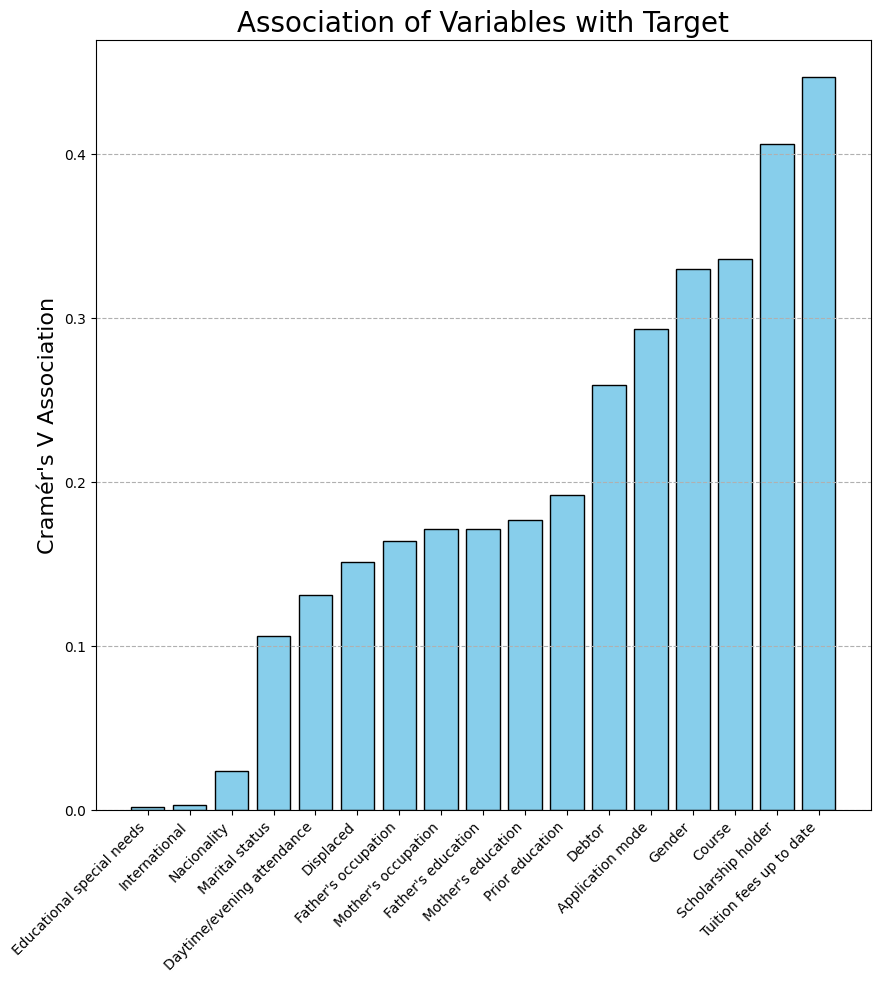

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))

bars = ax.bar(associations.index[:-1], associations.values[:-1], color='skyblue', lw=1, ec='k')
ax.set_title('Association of Variables with Target', fontsize=20)
ax.set_ylabel('Cramér\'s V Association', fontsize=16)
plt.xticks(rotation=45, ha='right')
ax.grid(axis='y', linestyle='--')

plt.savefig("association_bar.png", bbox_inches='tight')

plt.show()

In [34]:
train['Target'] = train['Target'].astype('category').cat.codes
correlations = train[continuous_features].corrwith(train['Target']).sort_values(key = lambda x: abs(x))
correlations

Unemployment rate          0.015731
1st sem (credited)         0.035764
Inflation rate            -0.037344
2nd sem (credited)         0.038062
1st sem (no grade)        -0.060941
2nd sem (no grade)        -0.072690
GDP                        0.106462
Application order          0.128394
Prior education (grade)    0.138119
1st sem (evaluations)      0.152398
Admission grade            0.172880
2nd sem (evaluations)      0.214951
1st sem (enrolled)         0.263657
2nd sem (enrolled)         0.289165
Age at enrollment         -0.320679
1st sem (grade)            0.661355
2nd sem (grade)            0.719036
1st sem (approved)         0.725490
2nd sem (approved)         0.781452
Target                     1.000000
dtype: float64

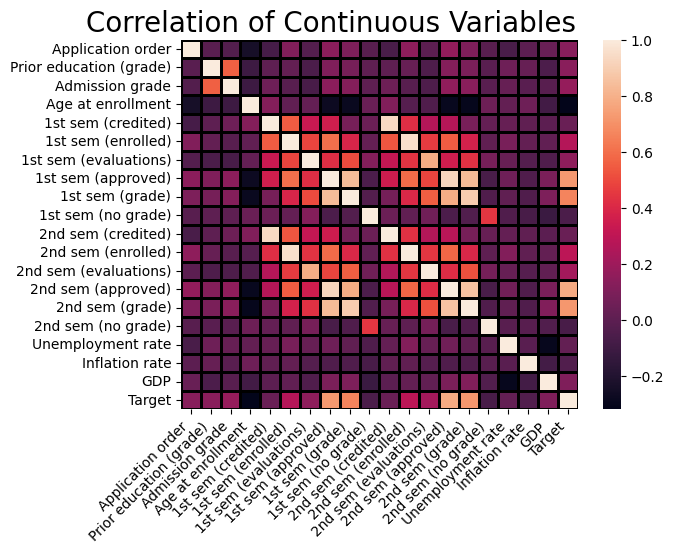

In [35]:
ax = plt.axes()
sns.heatmap(train[continuous_features].corr(), ax=ax, lw=1, linecolor='k')
ax.set_title('Correlation of Continuous Variables           ', fontsize=20)
plt.xticks(rotation=45, ha='right')

plt.savefig("continuous_heatmap.png", bbox_inches='tight')

plt.show()

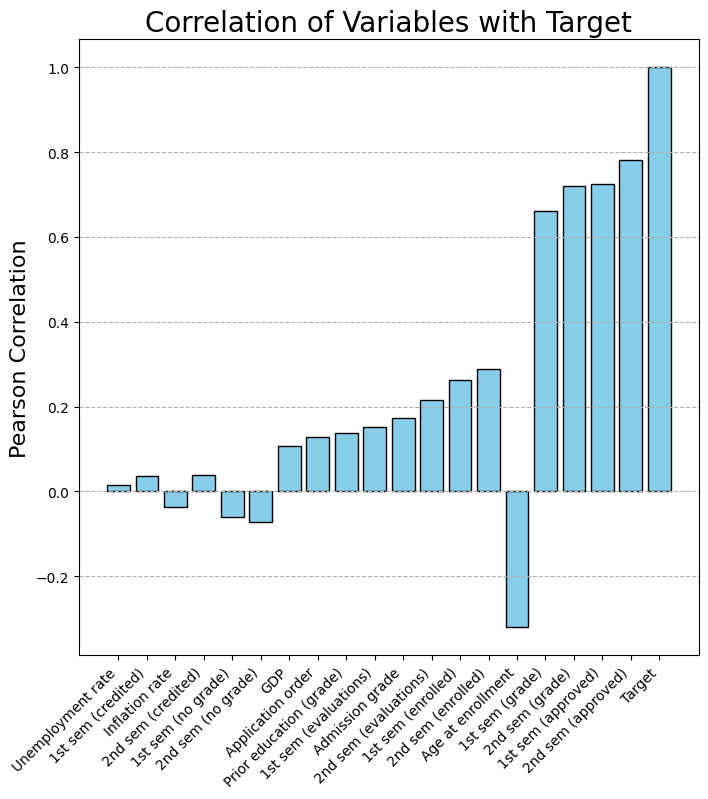

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.bar(correlations.index, correlations.values, color='skyblue', lw=1, ec='k')
ax.set_title('Correlation of Variables with Target', fontsize=20)
ax.set_ylabel('Pearson Correlation', fontsize=16)
plt.xticks(rotation=45, ha='right')
ax.grid(axis='y', linestyle='--')

plt.savefig("correlation_bar.png", bbox_inches='tight')

plt.show()

In [37]:
associations[-7:-1]

Debtor                     0.259
Application mode           0.293
Gender                     0.330
Course                     0.336
Scholarship holder         0.406
Tuition fees up to date    0.447
Name: Target, dtype: float64

In [38]:
# Load the data
train = pd.read_csv('../data/academic_success/train.csv')

train.columns = train.columns.str.replace('Curricular units ', '').str.replace('qualification', 'education')
train.columns = train.columns.str.replace('without evaluations', 'no grade').str.replace('Previous', 'Prior')

In [39]:
tuition = train[['Tuition fees up to date', 'Target']].copy()
tuition[['Dropout', 'Enrolled', 'Graduate']] = tuition.Target.str.get_dummies()
tuition.apply(lambda column: scipy_cramer(tuition, column_name=column.name))

,Tuition fees up to date,Target,Dropout,Enrolled,Graduate
Tuition fees up to date,1.000,0.447,0.446,0.131,0.317
Target,0.447,1.000,1.000,1.000,1.000
Dropout,0.446,1.000,1.000,0.346,0.667
Enrolled,0.131,1.000,0.346,1.000,0.468
Graduate,0.317,1.000,0.667,0.468,1.000


In [40]:
scholarship = train[['Scholarship holder', 'Target']].copy()
scholarship[['Dropout', 'Enrolled', 'Graduate']] = scholarship.Target.str.get_dummies()
scholarship.apply(lambda column: scipy_cramer(scholarship, column_name=column.name))

,Scholarship holder,Target,Dropout,Enrolled,Graduate
Scholarship holder,1.000,0.406,0.316,0.130,0.401
Target,0.406,1.000,1.000,1.000,1.000
Dropout,0.316,1.000,1.000,0.346,0.667
Enrolled,0.130,1.000,0.346,1.000,0.468
Graduate,0.401,1.000,0.667,0.468,1.000


In [41]:
course = train[['Course', 'Target']].copy()
course[['Dropout', 'Enrolled', 'Graduate']] = course.Target.str.get_dummies()
course.apply(lambda column: scipy_cramer(course, column_name=column.name))

,Course,Target,Dropout,Enrolled,Graduate
Course,1.000,0.336,0.338,0.255,0.431
Target,0.336,1.000,1.000,1.000,1.000
Dropout,0.338,1.000,1.000,0.346,0.667
Enrolled,0.255,1.000,0.346,1.000,0.468
Graduate,0.431,1.000,0.667,0.468,1.000


In [42]:
gender = train[['Gender', 'Target']].copy()
gender[['Dropout', 'Enrolled', 'Graduate']] = gender.Target.str.get_dummies()
gender.apply(lambda column: scipy_cramer(gender, column_name=column.name))

,Gender,Target,Dropout,Enrolled,Graduate
Gender,1.000,0.33,0.298,0.030,0.305
Target,0.330,1.00,1.000,1.000,1.000
Dropout,0.298,1.00,1.000,0.346,0.667
Enrolled,0.030,1.00,0.346,1.000,0.468
Graduate,0.305,1.00,0.667,0.468,1.000


In [43]:
application = train[['Application mode', 'Target']].copy()
application[['Dropout', 'Enrolled', 'Graduate']] = application.Target.str.get_dummies()
application.apply(lambda column: scipy_cramer(application, column_name=column.name))

,Application mode,Target,Dropout,Enrolled,Graduate
Application mode,1.000,0.293,0.399,0.103,0.326
Target,0.293,1.000,1.000,1.000,1.000
Dropout,0.399,1.000,1.000,0.346,0.667
Enrolled,0.103,1.000,0.346,1.000,0.468
Graduate,0.326,1.000,0.667,0.468,1.000


In [44]:
debtor = train[['Debtor', 'Target']].copy()
debtor[['Dropout', 'Enrolled', 'Graduate']] = debtor.Target.str.get_dummies()
debtor.apply(lambda column: scipy_cramer(debtor, column_name=column.name))

,Debtor,Target,Dropout,Enrolled,Graduate
Debtor,1.000,0.259,0.256,0.053,0.199
Target,0.259,1.000,1.000,1.000,1.000
Dropout,0.256,1.000,1.000,0.346,0.667
Enrolled,0.053,1.000,0.346,1.000,0.468
Graduate,0.199,1.000,0.667,0.468,1.000


In [45]:
application = train['Application mode'].astype(str).str.get_dummies()
application[['Dropout', 'Enrolled', 'Graduate']] = train.Target.str.get_dummies()
application.apply(lambda column: scipy_cramer(application, column_name=column.name))[['Dropout', 'Enrolled', 'Graduate']]

,Dropout,Enrolled,Graduate
1,0.280,0.015,0.252
10,0.005,0.001,0.004
12,0.003,0.002,0.004
15,0.011,0.015,0.001
16,0.022,0.002,0.022
17,0.043,0.023,0.022
18,0.021,0.015,0.008
2,0.004,0.002,0.006
26,0.003,0.002,0.004
27,0.002,0.003,0.000


In [121]:
course_map = {
    '33': 'Biofuel Production Technologies',
    '171': 'Animation and Multimedia Design',
    '8014': 'Social Service (evening attendance)',
    '9003': 'Agronomy',
    '9070': 'Communication Design',
    '9085': 'Veterinary Nursing',
    '9119': 'Informatics Engineering',
    '9130': 'Equinculture',
    '9147': 'Management',
    '9238': 'Social Service',
    '9254': 'Tourism',
    '9500': 'Nursing',
    '9556': 'Oral Hygiene',
    '9670': 'Advertising and Marketing Management',
    '9773': 'Journalism and Communication',
    '9853': 'Basic Education',
    '9991': 'Management (evening attendance)'
  }

course = train['Course'].astype(str).str.get_dummies()
course[['Dropout', 'Enrolled', 'Graduate']] = train.Target.str.get_dummies()
course['Target'] = train.Target.copy()
course_associations = course.apply(lambda column: scipy_cramer(course, column_name=column.name))[['Target', 'Dropout', 'Enrolled', 'Graduate']]
course_associations.sort_values(by='Dropout', inplace=True)
course_associations.index = course_associations.index.map(course_map)
course_associations = course_associations[course_associations.index.notna()].drop(columns=['Target'])
course_associations

,Dropout,Enrolled,Graduate
Management,0.002,0.160,0.129
Veterinary Nursing,0.004,0.041,0.029
Advertising and Marketing Management,0.005,0.022,0.022
Oral Hygiene,0.009,0.009,0.001
Basic Education,0.016,0.083,0.081
Tourism,0.024,0.042,0.055
Biofuel Production Technologies,0.027,0.004,0.022
Social Service (evening attendance),0.033,0.041,0.001
Communication Design,0.054,0.025,0.071
Equinculture,0.067,0.012,0.073


<AxesSubplot: >

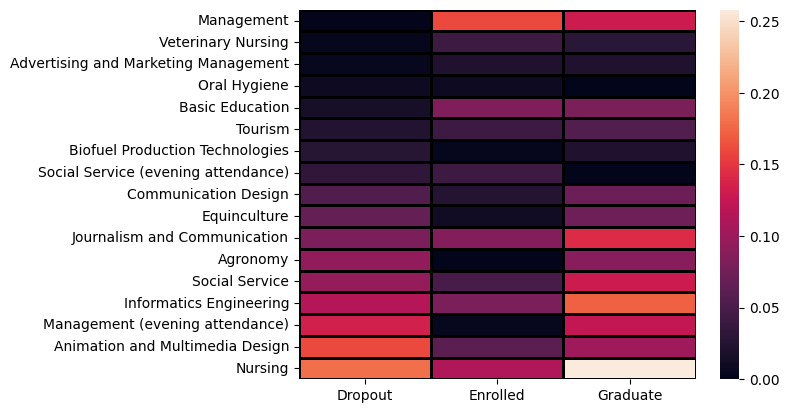

In [122]:
sns.heatmap(course_associations, lw=1, linecolor='k')

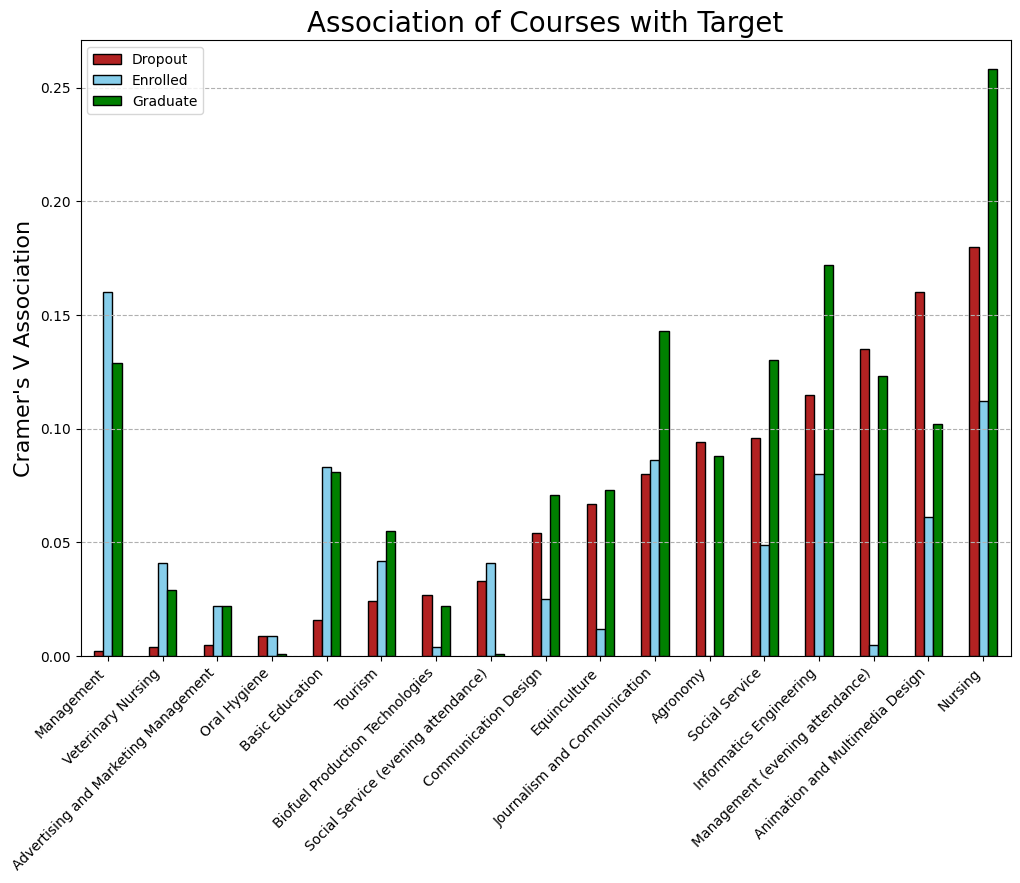

In [125]:
fig, ax = plt.subplots(figsize=(12, 8))

course_associations.plot(kind='bar', ax=ax, lw=1, ec='k', color=['firebrick', 'skyblue', 'green'])
ax.set_title('Association of Courses with Target', fontsize=20)
ax.set_ylabel('Cramer\'s V Association', fontsize=16)
plt.xticks(rotation=45, ha='right')
ax.grid(axis='y', linestyle='--')

plt.savefig("courses_bar.png", bbox_inches='tight')

plt.show()